# **Análisis Discriminante lineal**

El objetivo del Análisis Discriminante lineal (LDA) es encontrar el subespacio de características que optimiza la separabilidad de las clases y es una técnica supervisada.
El LDA como se conoce actualmente para múltiples clases, funciona bajo la suposición de que las clases tienen matrices de covarianza iguales y las clases tienen distribuciones normales. Otra suposición es que las instancias en el conjunto de entrenamiento son independientes entre si. Si una o más de una de las suposiciones anteriores no se cumplieran, la técnica del LDA funciona bastante bien.

## Pasos en el análisis discriminante lineal



Sea un conjunto de datos $\mathbf{X}$ de dimensiones $n\times d$ de $d$ características y n instancias:



1.   Normalizar los datos $d$-dimensionales.
2.   Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i=\frac{1}{n_i}\sum_{\mathbf{x}\in D_i} \mathbf{x}_m$$
3.   Calcular las matrices: matriz de dispersión entre clases $\mathbf{S}_B$ y matriz de dispersión intra clase $\mathbf{S}_W$. Lo que se busca es maximizar el criterio de Fischer (relación entre la diferencia de las medias entre clases y la varianza intraclase)

$$J(\mathbf{w})= \frac{\mathbf{w}^T\mathbf{S}_B\mathbf{w}}{\mathbf{w}^T\mathbf{S}_W\mathbf{w}}$$

4.   Calcular los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.
5.   Ordenar los autovectores en orden decreciente a los autovalores y Seleccionar $k$ autovectores que correspondan a los $k$ autovalores más grandes.
6.   Formar una matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.
7.   Proyectar las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import sys
#from IPython.display import Image, display
#if 'google.colab' in sys.modules:
#    from google.colab import drive
#    drive.mount('/content/drive')
#    %cd '/content/drive/MyDrive/Inteligencia Artificial y Aprendizaje Maquinal/IA - Clases de Práctica/ContenidosPorTemas'

Vamos a utilizar un dataset disponible de vinos (Wine dataset) que consiste en 178 instancias de 13 características que describen sus propiedades químicas. Las instancias pertenecen a una de 3 clases: 1,2,3 que hacen referencia a 3 tipos uvas cultivadas en una misma región de Italia pero derivadas de diferentes viñedos.

In [2]:
# Abrimos el archivo 'wine'
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# Visualizamos los datos que contiene el archivo
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Extrae del dataset la columna correspondiente a las clases (columna 0) para formar el vector **y** y los datos **X** correspondientes a las características

In [3]:
df_wine_clases = df_wine[0] # Nos quedamos con las etiquetas
df_wine_caracteristicas = df_wine.loc[:, 1:] # Nos quedamos con las caracteristicas

Divide los datos en conjuntos de entrenamiento `X_train` y `y_train` y conjuntos de prueba `X_test` y `y_test` utiliza `random_state=42`

In [4]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en 4 conjuntos:
# X_train ---> tendrá las caracteristicas de entrenamiento
# X_test  ---> tendrá las caracteristicas de testeo
# y_train ---> tendrá las etiquetas de entrenamiento
# y_test  ---> tendrá las etiquetas de testeo
X_train, X_test, y_train, y_test = train_test_split(df_wine_caracteristicas, df_wine_clases, test_size=0.3, shuffle=True, random_state=1,  stratify = df_wine_clases)

1. Normaliza los datos (d=13) para obtener las variables escaladas `X_train_std` y `X_test_std`.

In [5]:
from sklearn.preprocessing import StandardScaler

df_wine.describe()

# Normalizamos las caracteristicas de los conjuntos de entrenamiento y testeo para que tengan la misma escala
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

2. Calcular los vectores de medias $\mathbf{m}_i$ para cada clase.
$$\mathbf{m}_i= \left[ \begin{align} &\mu_0^{i} \\ &\mu_1^{i} \\ &\:\vdots \\ &\mu_{11}^{i} \end{align} \right] , \quad i=1,2,3$$

Guardar los 3 vectores en una lista llamada `mean_vecs`

In [18]:
np.set_printoptions(precision = 4)

mean_vecs = [] # Inicializamos la lista que contendrá las medias de los vectores de cada clase

# Con un bucle for recorremos todas las etiquetas
for etiqueta in sorted(y_train.unique()):
    df_clases = X_train_std[y_train == etiqueta] # Buscamos todas las filas que tienen la misma etiqueta
    media_vec = df_clases.mean(axis=0) # Extraemos el índice del vector con medias de cada clase
    mean_vecs.append(media_vec) # Lo agregamos a la lista

mean_vecs

[array([ 0.8998, -0.36  ,  0.301 , -0.743 ,  0.4679,  0.9176,  0.9809,
        -0.6287,  0.6403,  0.2018,  0.4958,  0.7642,  1.1697]),
 array([-0.9191, -0.3613, -0.367 ,  0.2926, -0.4362, -0.1187,  0.0098,
         0.1098, -0.0235, -0.8556,  0.372 ,  0.2343, -0.7699]),
 array([ 0.2748,  0.9947,  0.1821,  0.4798,  0.0796, -0.9602, -1.2334,
         0.6148, -0.7599,  1.0456, -1.1796, -1.3044, -0.2868])]

3. Cálculo de las matrices:

**Matriz intra-clase:**

$\mathbf{S}_W = \sum \mathbf{S_i}$

Matriz de dispersión por clase:

$\mathbf{S}_i = \sum_{\mathbf{x}\in D_i}(\mathbf{x} - \mathbf{m}_i)(\mathbf{x}- \mathbf{m}_i)^T$

donde $D_i$ es el conjunto de instancias correspondiente a la clase $i$

In [19]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.zeros((d, d))  # matriz de dispersión de cada clase
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # vectores columna
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # suma de las matrices de dispersión

print('Matriz de dispersión intra-clase: '
      f'{S_W.shape[0]}x{S_W.shape[1]}')

Matriz de dispersión intra-clase: 13x13


**Matriz entre-clases:**

$\mathbf{S}_B = \sum_{i=1}^{c}n_i(\mathbf{m}_i - \mathbf{m})(\mathbf{m}_i- \mathbf{m})^T$

Donde $\mathbf{m}$ es el vector de medias global considerando todas las clases.

In [20]:
mean_overall = np.mean(X_train_std, axis=0)
mean_overall = mean_overall.reshape(d, 1)  # lo hago vector columna

d = 13  # number of features
S_B = np.zeros((d, d))

for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Matriz de dispersión entre clases: '
      f'{S_B.shape[0]}x{S_B.shape[1]}')

Matriz de dispersión entre clases: 13x13


4.   Calcule los autovectores y sus correspondientes autovalores de la matriz $\mathbf{S}^{-1}_W \mathbf{S}_B$.

In [21]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

5.   Ordene los autovectores en orden decreciente a los autovalores y Seleccione $k$ autovectores de acuerdo a los $k$ autovalores más grandes

**Ordene los autovectores en orden descendente de los autovalores:**

In [22]:
# lista de tuplas (autovalor, autovector)
eigen_pairs = [ (np.abs(eigen_vals[i]), eigen_vecs[:, i].real) for i in range(len(eigen_vals))]

# ordenamos las tuplas de mayor a menor
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
print('Autovalores en orden descendente:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Autovalores en orden descendente:

9.68988088508376
4.505702559297167
7.398948319001918e-16
6.391074563063587e-16
5.669989625574702e-16
5.669989625574702e-16
5.548563837014214e-16
2.928865025692802e-16
2.928865025692802e-16
2.7241704119150866e-16
1.1002686280086663e-16
1.9323732581570222e-17
0.0


6.   Forme la matriz $\mathbf{W}$ de dimensiones $d \times k$ donde cada columna representa un autovector.

In [23]:
w = np.hstack( (eigen_pairs[0][1].reshape(13,1), eigen_pairs[1][1].reshape(13,1)) )
print('Matriz W:\n', w)

Matriz W:
 [[-0.1495 -0.4157]
 [ 0.0654 -0.1306]
 [ 0.0121 -0.3365]
 [ 0.2433  0.2667]
 [-0.0149 -0.0209]
 [ 0.1837 -0.0896]
 [-0.7328  0.4632]
 [-0.096   0.145 ]
 [ 0.0241  0.0529]
 [ 0.3365 -0.2891]
 [-0.0939  0.1834]
 [-0.3162 -0.0431]
 [-0.3334 -0.5098]]


7.   Proyecte las muestras en el nuevo subespacio de características usando la matriz de transformación para obtener los datos transformados en dimensión $n \times k$.

In [26]:
X_train_lda = X_train_std.dot(w)

Realice un **gráfico de dispersión** de los datos tranformados `X_train_lda` en 2 dimensiones, utilice diferentes marcadores ('o', 's' ,'^') y diferentes colores para las 3 clases. Considera que las clases son separables en este subespacio?

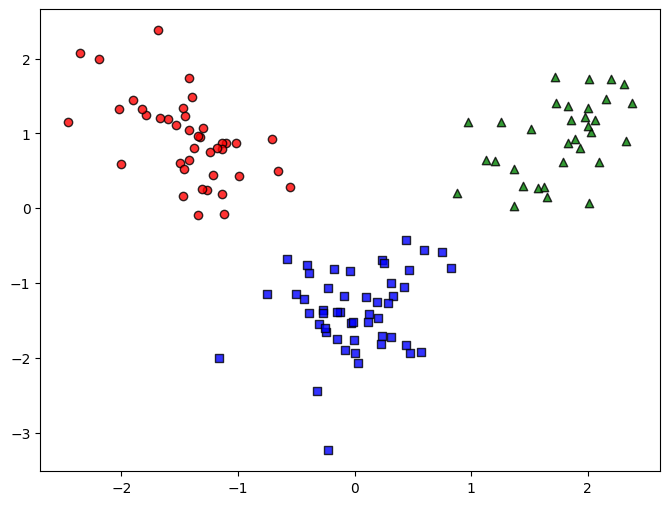

In [56]:
# Gráfico de dispersión con los datos transformados segun las matrices
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
plt.figure(figsize=(8,6))
for indice, clas in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train_lda[y_train == clas, 0],
                y=-X_train_lda[y_train == clas, 1],
                alpha=0.8,
                c=colors[indice],
                marker=markers[indice],
                label = clas,
                edgecolor='black')
plt.show()

## LDA usando Scikit-Learn

Usando la [documentación](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html), utilice el análisis discriminante lineal de scikit learn sobre `X_train_std`para obtener el mismo resultado. Compare los graficos de dispersión.

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Entrenamiento
lda = LDA()
X_train_lda2 = lda.fit_transform(X_train_std, y_train)

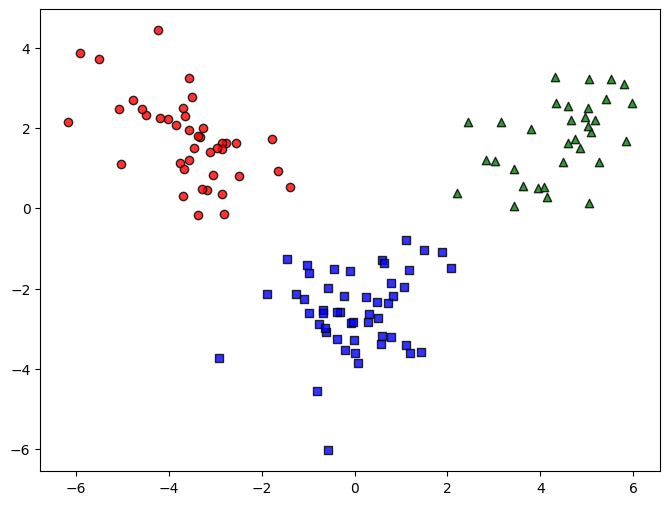

In [55]:
#Grafico los datos transformados (gráfico de dispersión)
colors = ['r', 'b', 'g']
markers = ['o', 's', '^']
plt.figure(figsize=(8,6))
for indice, clas in enumerate(np.unique(y_train)):
    plt.scatter(x=X_train_lda2[y_train == clas, 0],
                y=X_train_lda2[y_train == clas, 1],
                alpha=0.8,
                c=colors[indice],
                marker=markers[indice],
                label = clas,
                edgecolor='black')
plt.show()

Evalue el modelo con los datos de prueba `X_test_std` y calcule el `accuracy`

In [51]:
lda.score(X_test_std, y_test)
# La precisión del clasificador es de 0.9814, siendo un muy buen clasificadores de las clases

0.9814814814814815